In [1]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier

from yellowbrick.classifier import ClassificationReport

warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/lisahuynh/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('LasVegasTripAdvisorReviews.csv', sep=';')

In [3]:
df.head(5)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [4]:
df.describe()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,48.130952,16.023810,31.751984,4.123016,2196.380952,0.767857
std,74.996426,23.957953,48.520783,1.007302,1285.476807,80.692897
min,1.000000,0.000000,0.000000,1.000000,188.000000,-1806.000000
25%,12.000000,5.000000,8.000000,4.000000,826.000000,2.000000
50%,23.500000,9.000000,16.000000,4.000000,2700.000000,4.000000
75%,54.250000,18.000000,35.000000,5.000000,3025.000000,6.000000
max,775.000000,263.000000,365.000000,5.000000,4027.000000,13.000000


In [5]:

df['Score'].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

In [6]:
df.groupby("Pool").mean()


,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
Pool,,,,,,
NO,29.208333,7.791667,18.500000,3.208333,3773.00,3.833333
YES,49.077083,16.435417,32.414583,4.168750,2117.55,0.614583


In [7]:
df.groupby("Gym").mean()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years
Gym,,,,,,
NO,71.541667,20.958333,45.166667,4.083333,188.0,3.583333
YES,46.960417,15.777083,31.081250,4.125000,2296.8,0.627083


In [8]:
LABEL_MAP = {
"YES": 1,
"NO": 0
}
# Convert categorical labels into incremental value
df['Pool'] = df['Pool'].map(LABEL_MAP).to_frame()
df['Gym'] = df['Gym'].map(LABEL_MAP).to_frame()
df['Tennis court'] = df['Tennis court'].map(LABEL_MAP).to_frame()
df['Spa'] = df['Spa'].map(LABEL_MAP).to_frame()
df['Free internet'] = df['Free internet'].map(LABEL_MAP).to_frame()
df['Casino'] = df['Casino'].map(LABEL_MAP).to_frame()

In [9]:

df = df.drop(columns=['User continent', 'User country', 'Period of stay', 'Traveler type', 'Hotel name', 'Hotel stars',
            'Review month', 'Review weekday'])


In [10]:
df.head(5)

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Pool,Gym,Tennis court,Spa,Casino,Free internet,Nr. rooms,Member years
0,11,4,13,5,0,1,0,0,1,1,3773,9
1,119,21,75,3,0,1,0,0,1,1,3773,3
2,36,9,25,5,0,1,0,0,1,1,3773,2
3,14,7,14,4,0,1,0,0,1,1,3773,6
4,5,5,2,4,0,1,0,0,1,1,3773,7


In [18]:

from sklearn.model_selection import train_test_split

#includes all columns, except the following objects and target variables
X = df.loc[:, df.columns.difference(['Score'])] 
y = df.iloc[:,3]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)
X_sm, y_sm = sm.fit_sample(X, y)


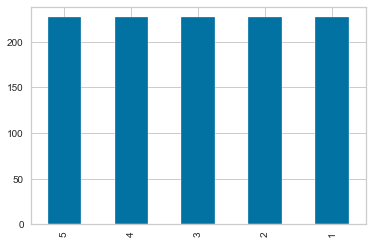

In [20]:
X_sm, y_sm = sm.fit_sample(X_sm, y_sm.ravel())
pd.Series(y_sm).value_counts().plot.bar()

In [21]:
def score_model(X, y, estimator, **kwargs):

    y = LabelEncoder().fit_transform(y)

    model = Pipeline([
         ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')), 
         ('estimator', estimator)
    ])

    model.fit(X_train, y_train, **kwargs)  
    
    expected  = y_test
    predicted = model.predict(X_test)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted, average='micro')))

In [22]:
models = [
    SVC(), 
    #NuSVC(), 
    LinearSVC(), 
    SGDClassifier(), KNeighborsClassifier(), 
    LogisticRegression(), 
    #aggingClassifier(), 
    ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100,learning_rate=.3)
    #learning_rate=.5,max_depth=4, min_samples_leaf=75
]

for model in models:
    score_model(X_train, y_train, model)

SVC: 0.5247524752475248
LinearSVC: 0.38613861386138615
SGDClassifier: 0.33663366336633666
KNeighborsClassifier: 0.40594059405940597


/Users/lisahuynh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression: 0.46534653465346537
ExtraTreesClassifier: 0.45544554455445546
RandomForestClassifier: 0.46534653465346537
GradientBoostingClassifier: 0.43564356435643564
